In [70]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import matplotlib.pyplot as plt


In [96]:
# Définition des fonts qui seront utilisées pour les plots

font_title = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 18}

font_xy_label = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 16}

font_ticks = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 14}

font_label = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}

In [6]:
# Evolution temporelle retourne pour une dataframe les differentes variables groupées par ping, 
# puis aggreer par moyenne, std, ou somme
# -> Permet de moyenner un csv dans l'espace pour ne considerer que les variations temporelles

def evolution_temporelle(df):
    
    # On fait des groupby avec différents aggrégateurs
    # Les résultats obtenus avzec l'aggrégateur std n'ont pas été utilisés par la suite. 
    
    df_mean       = df[['ebike', 'mechanical', 'duedate', 'numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'ping_time']].groupby('ping_time').mean()
    df_std        = df[['ebike', 'mechanical', 'duedate', 'numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'ping_time']].groupby('ping_time').std()
    df_sum        = df[['ebike', 'mechanical','numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'ping_time']].groupby('ping_time').sum()
    
    
    # On renomme ici les colonnes pour qu'elles aient des noms distincts, pour pouvoir concatener le tout
    
    df_mean= df_mean[['ebike', 'mechanical', 'numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'duedate']].add_suffix('_mean')
    df_std= df_std[['ebike', 'mechanical', 'numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning', 'duedate']].add_suffix('_std')
    df_sum= df_sum[['ebike', 'mechanical','numbikesavailable', 'numdocksavailable', \
    'capacity', 'is_renting', 'is_installed', 'is_returning']].add_suffix('_sum')
    
    # Je rajoute une colonne qui nous donne l'information sur le nombre de station
    df_sum['nbr_station'] = df['name'].nunique()
    
    # On retourne la concaténation des 3 dataframes
    return pd.concat([df_mean, df_std, df_sum], axis=1)
    


In [7]:
## Applique evolution_temporelle sur chque csv et synthétise le tout dans un unique dataframe
# ATTENTION : C'EST DU BRICOLAGE, CA FONCTIONNE MAIS A REVOIR DOIT Y AvOIR PLUS SIMPLE

# Pour pouvoir regrouper toutes les données en 1 fichier nous etions confrontés a deux problematiques :

# 1 - Pour un mois donné, cad 1 csv, les pingtime pouvaient etre postérieur au mois en question. 
#     -> J'ai decidé de les supprimer

# 2 - Nous avons parfois des chevauchements de ping time d'un mois a l'autre. J'ai gardé ceux du premier mois. 

def lecture_data_temp():
    
    # Creation d'une dataframe vide qui va contenir la concatenation des différents mois
    df = pd.DataFrame()
    # Liste des fichiers a notre disposition, dans l'ordre chronologique
    L = ['MAY_2022', 'JUN_2022', 'JUL_2022', 'AUG_2022', 'NOV_2022', 'DEC_2022',\
        'JAN_2023', 'FEB_2023', 'MAY_2023', 'JUN_2023', 'JUL_2023', 'AUG_2023', 'SEP_2023', 'OCT_2023']
    
    # Concertion au format datetime
    L_datetime= pd.to_datetime(np.array(L), format='%b_%Y')
    
    # repertoire ou se trouve les données traitées que nous allons utiliser
    directory = 'Data\\Data_velib\\Data_velib_traitées'
    
    i=0
    # On boucle sur l'ensemble des fichuers
    while i< len(L):
        
        f1 = os.path.join(directory, "Velib_"+L[i]+'.csv')
        print("Velib_"+L[i]+'.csv')
        
        # Si on est pas à la fin de la liste, càd pas sur le dernier mois de notre jeu de données
        if i < len(L)-1:
            # Si on est au debyt du jeu de donnée, on lis simplement le fichier correspondant 
            # puis on applique evolution_temporelle
            if i == 0:
                M1 = pd.read_csv(f1, parse_dates = ['duedate', 'ping_time'])
                M1 = evolution_temporelle(A)
            else:
                M1 = M2
                
            # f2 : lien vers le csv qui est chronologiquement a la suite de f1. 
            f2 = os.path.join(directory, "Velib_"+L[i+1]+'.csv')
            M2 = pd.read_csv(f2, parse_dates = ['duedate', 'ping_time'])
            print('Traitement fichier ...')
            M2 = evolution_temporelle(A2)
            
            # Si 1 mois sépare les deux csv successifs (c'est pas toujours le cas car y'a des trous)
            if L_datetime[i+1] == L_datetime[i] + pd.DateOffset(months=1):
                # Alors on ne garde dans M1 que les pingtime qui sont avant le premier pingtime du csv qui suit. 
                M1 = M1[M1.index<M2.index.min()]
            else :
                # Sinon on ne garde que les ping time du mois correspondant
                M1 = M1[M1.index<L2_datetime[i] + pd.DateOffset(months=1)]
                
        # Si i = len(L)-1, cad si on est à la fin de la liste L:
        else :
            # Alors on ne garde que les ping time du mois correspondant
            M1=M2
            M1 = M1[M1.index<L2_datetime[len(L2)-1] + pd.DateOffset(months=1)]
            
        # On rajoute le mois M1 a la dataframe df.
        df=pd.concat([df, M1])
        i+=1
    return df



In [11]:
# ATTENTION C'EST LONG A FAIRE TOURNER

# Conversion des données que l'on stock dans df_time, puis on sauvegarde le résultat dans un csv.

df_time = lecture_data_temp()
df_time.to_csv('Data\\Data_velib\\data_tempo.csv')

NameError: name 'df_time' is not defined

In [6]:
# df_time=pd.read_csv('Data\\Data_velib\\data_tempo.csv', index_col=['ping_time'], parse_dates = ['duedate_mean', 'ping_time'])


In [7]:
df_time

,ebike_mean,mechanical_mean,numbikesavailable_mean,numdocksavailable_mean,capacity_mean,is_renting_mean,is_installed_mean,is_returning_mean,duedate_mean,ebike_std,...,duedate_std,ebike_sum,mechanical_sum,numbikesavailable_sum,numdocksavailable_sum,capacity_sum,is_renting_sum,is_installed_sum,is_returning_sum,nbr_station
ping_time,,,,,,,,,,,,,,,,,,,,,
2022-05-01 00:50:01,4.273885,6.973815,11.247700,19.146497,31.474168,1.0,1.0,1.0,2022-05-01 00:38:21.803963392,4.166932,...,0 days 00:02:31.526119220,6039.0,9854.0,15893,27054,44473,1413,1413,1413,1420
2022-05-01 01:00:01,4.294409,7.020524,11.314933,19.077849,31.474168,1.0,1.0,1.0,2022-05-01 00:39:14.419674624,4.163405,...,0 days 00:02:28.742500802,6068.0,9920.0,15988,26957,44473,1413,1413,1413,1420
2022-05-01 01:10:01,4.325548,7.023355,11.348903,19.046001,31.474168,1.0,1.0,1.0,2022-05-01 00:39:14.419674624,4.205777,...,0 days 00:02:28.742500786,6112.0,9924.0,16036,26912,44473,1413,1413,1413,1420
2022-05-01 01:20:01,4.334041,7.002831,11.336872,19.058033,31.474168,1.0,1.0,1.0,2022-05-01 00:38:21.803963392,4.180449,...,0 days 00:02:31.526119202,6124.0,9895.0,16019,26929,44473,1413,1413,1413,1420
2022-05-01 01:30:01,4.341826,7.022647,11.364473,19.031139,31.474168,1.0,1.0,1.0,2022-05-01 00:38:21.803963392,4.131676,...,0 days 00:02:31.526119182,6135.0,9923.0,16058,26891,44473,1413,1413,1413,1420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-07 01:58:01,3.412831,6.112273,9.525105,20.977685,31.707113,1.0,1.0,1.0,2023-10-07 01:08:33.698744832,3.256172,...,0 days 03:34:35.087703399,4894.0,8765.0,13659,30082,45468,1434,1434,1434,1433
2023-10-07 02:08:01,3.411437,6.110181,9.521618,20.984658,31.707113,1.0,1.0,1.0,2023-10-07 01:08:33.696652800,3.337416,...,0 days 03:34:35.087588460,4892.0,8762.0,13654,30092,45468,1434,1434,1434,1433
2023-10-07 02:18:01,3.430962,6.095537,9.526499,20.988145,31.707113,1.0,1.0,1.0,2023-10-07 01:08:33.698744832,3.397966,...,0 days 03:34:35.087703403,4920.0,8741.0,13661,30097,45468,1434,1434,1434,1433


# Méthodologie

Au départ, on a un dataset couvrant la période 2022-2023.

Ensuite, on a moyenné ce dataset sur l'ensemble du réseau des stations vélib à chaque ping_time et on obtient le dataframe (ci-dessus) de 51026 lignes et 27 colonnes avec en index la colonne ping_time.


Pour la partie grahique temporelle, on utilise des séries temporelles sur la base de moyenne mobile sur une journée, 
une semaine ou un mois en fonction des besoins de l’analyse pour réduire les bruits et distinguer des tendances (cf graphique ci-dessous). 
Dans cette partie, notre analyse portera sur le nombre de vélibs disponibles, le nombre de stations et le nombre de bornes de vélibs (capacité des stations vélibs).


## Evolution de la disponibilité sur la periode 2022-2023 : utilisation des moyennes mobiles

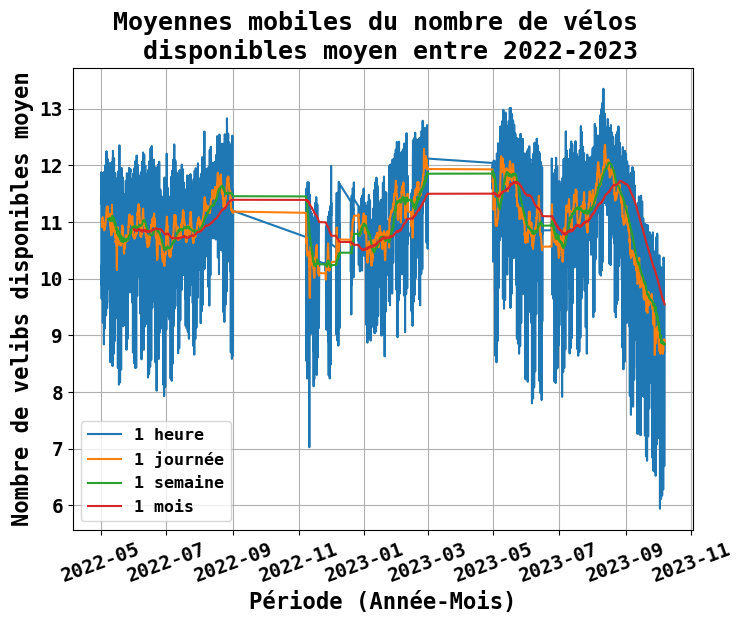

In [97]:
# Analyse sur toute la periode 2022-2023
    
fig, ax = plt.subplots(figsize = (8,6))

# Differentes moyennes mobiles. Plus la periode choisie est grande plus les données sont lissées. 
    
ax.plot(df_time['numbikesavailable_mean'].rolling(6).mean(), label = '1 heure') 
ax.plot(df_time['numbikesavailable_mean'].rolling(6*24).mean(), label = '1 journée') # moyenne mobile lissée sur une journée
ax.plot(df_time['numbikesavailable_mean'].rolling(6*24*7).mean(), label = '1 semaine') # moyenne mobile lissée sur une semaine
ax.plot(df_time['numbikesavailable_mean'].rolling(6*24*30).mean(), label = '1 mois')  # moyenne mobile lissée sur un mois
 
plt.xticks(rotation=20, **font_ticks) # On tourne les dates en absisses pour eviter qu'elles ne se chevauchent. 
plt.yticks(**font_ticks)
ax.grid() 
 
ax.set_title("Moyennes mobiles du nombre de vélos \n disponibles moyen entre 2022-2023", **font_title) # titre du graphique

ax.set_xlabel("Période (Année-Mois)", **font_xy_label) # label de l'axe des abscisses
ax.set_ylabel("Nombre de velibs disponibles moyen", **font_xy_label) # label de l'axe des ordonnées : nombre de velibs disponibles moyen

ax.legend(prop=font_label)
plt.show()

# Analyse sur toute la periode 2022-2023 : évolution de la moyenne mobile hebdomadaire du nombre de vélibs disponibles dans les stations


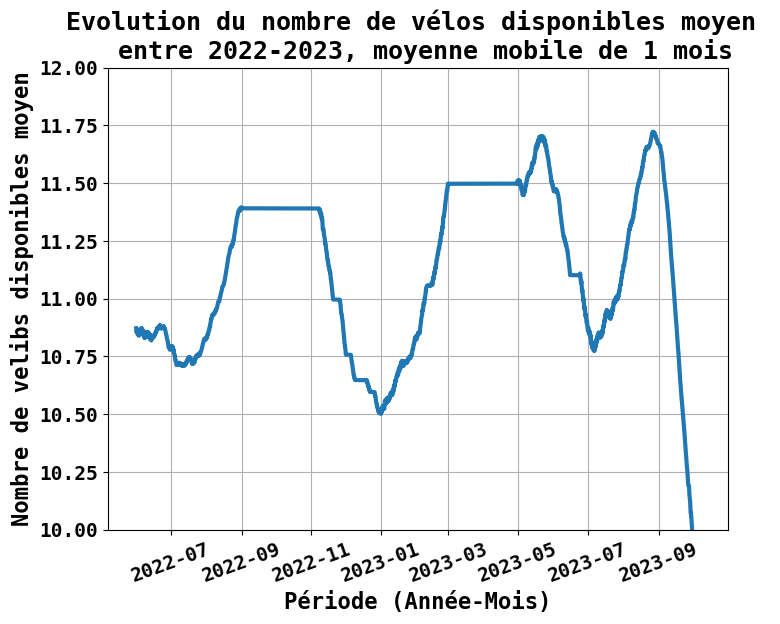

In [98]:
fig, ax = plt.subplots(figsize = (8,6))
    
ax.plot(df_time['numbikesavailable_mean'].rolling(6*24*30).mean(), linewidth=3)  # moyenne mobile lissée sur un mois
 
plt.xticks(rotation=20, **font_ticks) # On tourne les dates en absisses pour eviter qu'elles ne se chevauchent. 
plt.yticks(**font_ticks)
ax.set_ylim(10,12)
ax.grid() 
    
ax.set_title("Evolution du nombre de vélos disponibles moyen \n entre 2022-2023, moyenne mobile de 1 mois", **font_title) # titre du graphique
ax.set_xlabel("Période (Année-Mois)", **font_xy_label) # label de l'axe des abscisses
ax.set_ylabel("Nombre de velibs disponibles moyen", **font_xy_label) # label de l'axe des ordonnées : nombre de velibs disponibles moyen

plt.show()

A travers ce graphique, on observe un seuil correspondant à la moyenne de vélos disponibles autour de 11 qui nous permet de distinguer deux grosses périodes d'utilisation durant l'année :

- la première où on remarque une plus grande utilisation entre mai à juillet et décembre à février qui se traduit par une faible disponibiilté des vélos entre 10,75 et 11. Cela peut s'expliquer en été par les vacances et en hiver par le froid, pluie...
- et une seconde avec une moindre intensité en termes d'utilisation de août à novembre et mars à mai avec un nombre de vélos disponibles moyens compris entre 11 et 11,75. 

On ne constate pas de hausse globale de la disponibilité des vélibs.

# Evolution du nombre de stations velib entre 2022-2023

Text(0, 0.5, 'Nombre de stations velib')

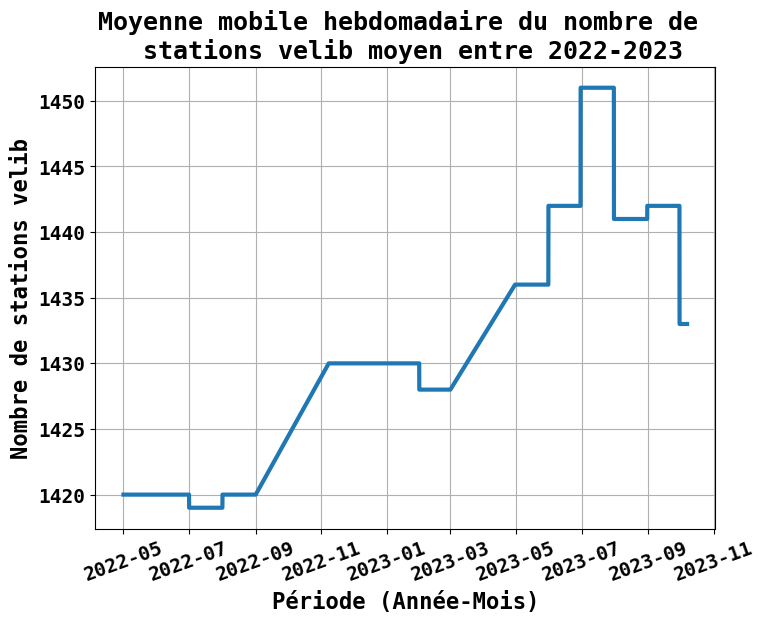

In [99]:
fig, ax = plt.subplots(figsize = (8,6))


# choix de la moyenne mobile hebdomadaire pour analyser l'évolution temporelle entre 2022 et 2023 du nombre de stations

ax.plot(df_time['nbr_station'], linewidth=3) # moyenne mobile mensuelle du nombre de stations avec un paramètre window s'étalant sur une semaine
 
plt.xticks(rotation=20, **font_ticks) 
plt.yticks(**font_ticks) 
ax.grid()
 
ax.set_title("Moyenne mobile hebdomadaire du nombre de \n stations velib moyen entre 2022-2023", **font_title) # titre du graphique

ax.set_xlabel("Période (Année-Mois)", **font_xy_label) # label de l'axe des abscisses
ax.set_ylabel("Nombre de stations velib", **font_xy_label) # label de l'axe des ordonnées : nombre de velibs disponibles moyen




Le nombre de stations vélib a augmenté de 30 entre mai 2022 et octobre 2023 notammment dans la perspective des JO.

# Evolution du nombre de bornettes dans les stations velib (capacité de la station) entre 2022-2023

Text(0, 0.5, 'Nombre de bornes velib')

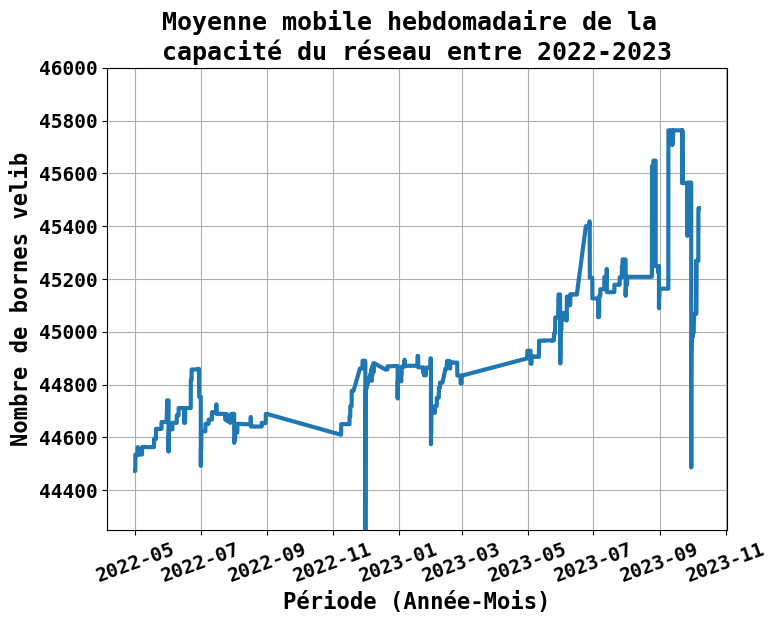

In [100]:
fig, ax = plt.subplots(figsize = (8,6))


# choix de la moyenne mobile hebdomadaire pour analyser l'évolution temporelle entre 2022 et 2023 du nombre de stations

ax.plot(df_time['capacity_sum'], linewidth=3) # moyenne mobile mensuelle du nombre de stations avec un paramètre window s'étalant sur une semaine
 
ax.set_ylim(44250, 46000)    
plt.xticks(rotation=20, **font_ticks) 
plt.yticks(**font_ticks) 
ax.grid()
 
ax.set_title("Moyenne mobile hebdomadaire de la \ncapacité du réseau entre 2022-2023", **font_title) # titre du graphique

ax.set_xlabel("Période (Année-Mois)", **font_xy_label) # label de l'axe des abscisses
ax.set_ylabel("Nombre de bornes velib", **font_xy_label) # label de l'axe des ordonnées : nombre de velibs disponibles moyen




On a une augmentation du nombre de bornettes qui confirme l'augmentation du nombre de stations velib durant cette période.
On est passé de 44600 à 45800 bornes.

# Nombre de vélos disponibles sur une journée type

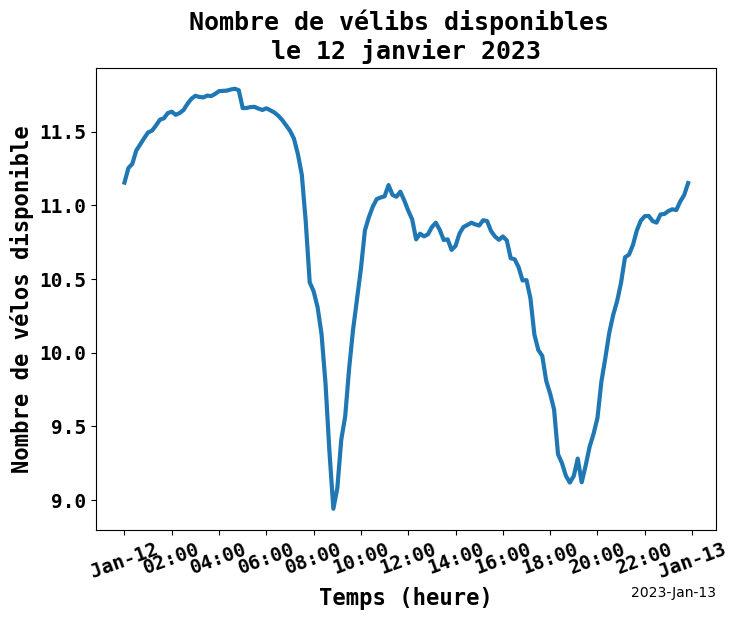

In [140]:
start_date = dt.datetime(2023, 1, 12) + pd.DateOffset(days=0)   
end_date   = dt.datetime(2023, 1, 12) + pd.DateOffset(days=1) 
mask = (df_time.index>= start_date) & (df_time.index <= end_date)     


fig, ax = plt.subplots(figsize = (8,6))

# Les 4 lignes qui suivent permettent de mettre les dates en absisses au bon format. 
locator = mdates.AutoDateLocator(minticks=12, maxticks=24)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)


ax.set_title("Nombre de vélibs disponibles \nle 12 janvier 2023", **font_title)   # titre du graphique
ax.set_xlabel('Temps (heure)', **font_xy_label)  
ax.set_ylabel('Nombre de vélos disponible', **font_xy_label) 

plt.xticks(rotation=20, **font_ticks) 
plt.yticks(**font_ticks) 

ax.plot(df_time.loc[mask, 'numbikesavailable_mean'], linewidth=3)  

plt.show()



# On peut aussi regarder la dérivée de la disponibilité :

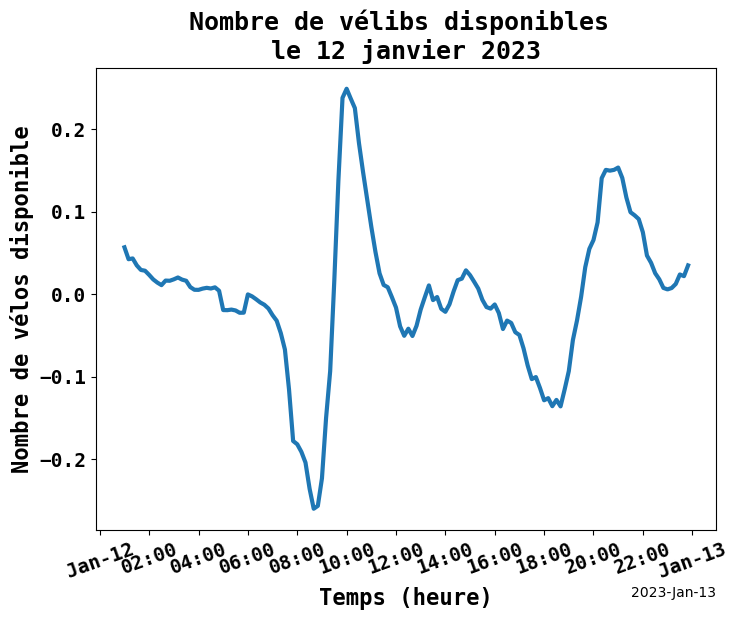

In [158]:
import matplotlib.dates as mdates

start_date = dt.datetime(2023, 1, 12) + pd.DateOffset(days=0)   
end_date   = dt.datetime(2023, 1, 12) + pd.DateOffset(days=1) 
mask = (df_time.index>= start_date) & (df_time.index <= end_date)  


fig, ax = plt.subplots(figsize = (8,6))

locator = mdates.AutoDateLocator(minticks=12, maxticks=20)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)


ax.set_title("Nombre de vélibs disponibles \nle 12 janvier 2023", **font_title)   # titre du graphique
ax.set_xlabel('Temps (heure)', **font_xy_label)  
ax.set_ylabel('Nombre de vélos disponible', **font_xy_label) 

plt.xticks(rotation=20, **font_ticks) 
plt.yticks(**font_ticks) 

        
# Il suffit de faire .diff() sur la serie temporelle pour obtenir la dérivée. J'ai ici fait une moyenne mobile d'une heure
# pour réduire le bruit mais c'est optionnelle. 
ax.plot(df_time.loc[mask, 'numbikesavailable_mean'].rolling(6).mean().diff(), linewidth=3)  

plt.show()


# Interessant car une periode de décroissance correspond a une dérivée négative et une periode de croissance une dérivée positive. Permet d'identifier rapidement les pertes et gains, mais perte d'information sur les quantitées.

# Différence utilisation vélib hiver / été

On choisit un jour type en hiver et un en été puis on compare le comportement des utilsateurs de vélibs.

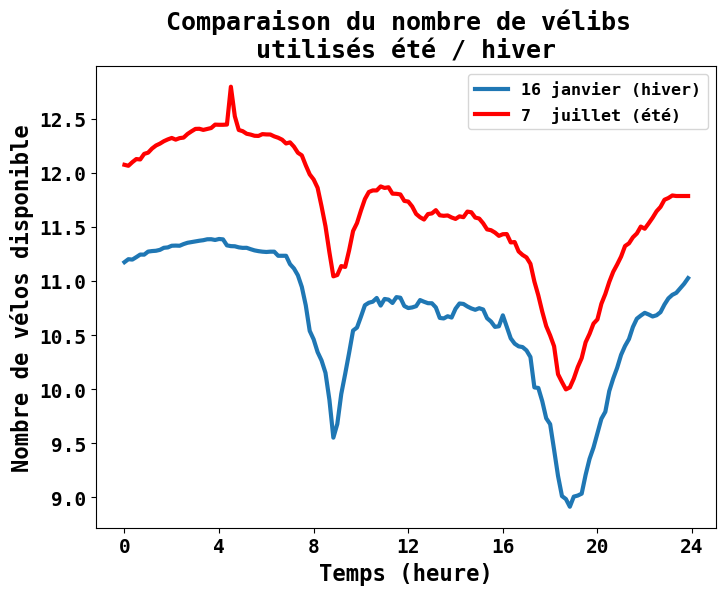

In [159]:
import datetime as dt 
import numpy as np

# Journée d'hiver -> le 16 janiver 2023
start_date = dt.datetime(2023, 1, 16) + pd.DateOffset(days=0)     
end_date   = dt.datetime(2023, 1, 16) + pd.DateOffset(days=1)                                                                    
mask = (df_time.index>= start_date) & (df_time.index <= end_date)         

Y1 = df_time.loc[mask,'numbikesavailable_mean'].to_numpy()   

# Journée d'été -> Le 7 juillet 2023
start_date = dt.datetime(2023, 8, 7) + pd.DateOffset(days=0)      
end_date   = dt.datetime(2023, 8, 7) + pd.DateOffset(days=1)      
mask = (df_time.index>= start_date) & (df_time.index <= end_date)            
                                                                   

Y2 = df_time.loc[mask,'numbikesavailable_mean'].to_numpy()       
                                                                    
                                                    
fig, ax = plt.subplots(figsize = (8,6))
    
X = np.arange(0, len(Y1))   
labels = range(0, 80*5, 4)      
plt.xticks(range(0, 2400, 24), labels, **font_ticks) # espacement de 24*10min = 4h
plt.yticks(**font_ticks) 

ax.set_title("Comparaison du nombre de vélibs \nutilisés été / hiver", **font_title)
ax.set_xlabel('Temps (heure)', **font_xy_label)
ax.set_ylabel('Nombre de vélos disponible', **font_xy_label) 

ax.plot(X, Y1, label='16 janvier (hiver)', linewidth=3)  
ax.plot(X, Y2, label='7  juillet (été)', linewidth=3, color='red')   

ax.legend(prop=font_label)



On constate une utilisation de velib plus marquée au mois de janvier qu'en été (en août) probablement dû aux vacances, utilisation
du velib lié au trajet domicile-travail en semaine donc en période de vacances (plus de vélos disponibles donc non utilisés).
Utilisation moindre de la part des touristes qui ne renversent pas cette tendance...

# Comparaison du nombre de velibs disponibles semaine / week-end

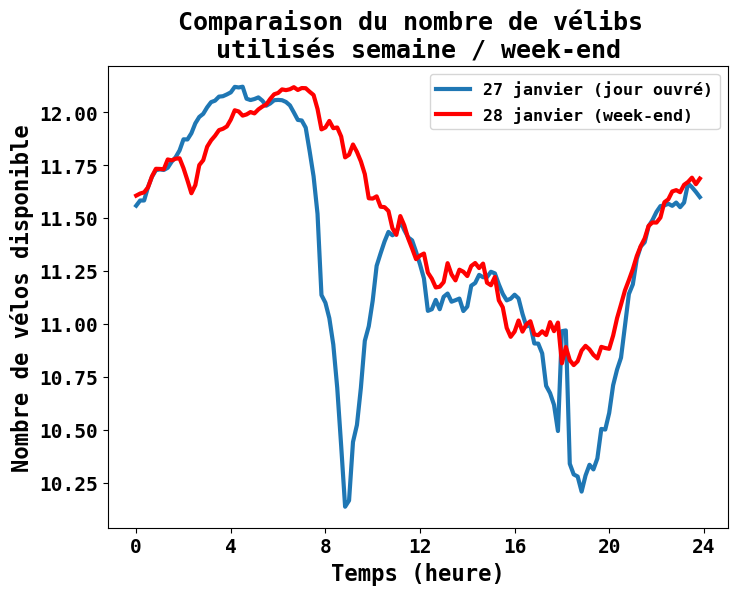

In [160]:


# Journée de semaine, ici le vendredi 27 janvier 2023 :
start_date = dt.datetime(2023, 1, 27) + pd.DateOffset(days=0)    
end_date   = dt.datetime(2023, 1, 27) + pd.DateOffset(days=1)     
mask = (df_time.index>= start_date) & (df_time.index <= end_date)        

# On convertie au format numpy la periode qui nous interesse
Y1 = df_time.loc[mask,'numbikesavailable_mean'].to_numpy() 

                  
# Journee de week-end, ici le samedi 28 janvier 2023
start_date = dt.datetime(2023, 1, 28) + pd.DateOffset(days=0)  
end_date   = dt.datetime(2023, 1, 28) + pd.DateOffset(days=1)                                                             
mask = (df_time.index>= start_date) & (df_time.index <= end_date)        

Y2 = df_time.loc[mask,'numbikesavailable_mean'].to_numpy()  
                                                         

fig, ax = plt.subplots(figsize = (8,6))
    
X = np.arange(0, len(Y1))   
labels = range(0, 80*5, 4)      
plt.xticks(range(0, 2400, 24), labels, **font_ticks) # espacement de 24*10min = 4h
plt.yticks(**font_ticks) 

ax.set_title("Comparaison du nombre de vélibs \nutilisés semaine / week-end", **font_title)
ax.set_xlabel('Temps (heure)', **font_xy_label)
ax.set_ylabel('Nombre de vélos disponible', **font_xy_label) 

ax.plot(X, Y1, label='27 janvier (jour ouvré)', linewidth=3)  
ax.plot(X, Y2, label='28 janvier (week-end)', linewidth=3, color='red')   

ax.legend(prop=font_label)





Moins de velibs disponibles en semaine qu'en week-end, donc, plus grande sollicitation du réseau en semaine,
lié au trajet domicile - travail (voir les pics de 9h et 18h).

# Comparatif jour de grève le 19/01/2023 

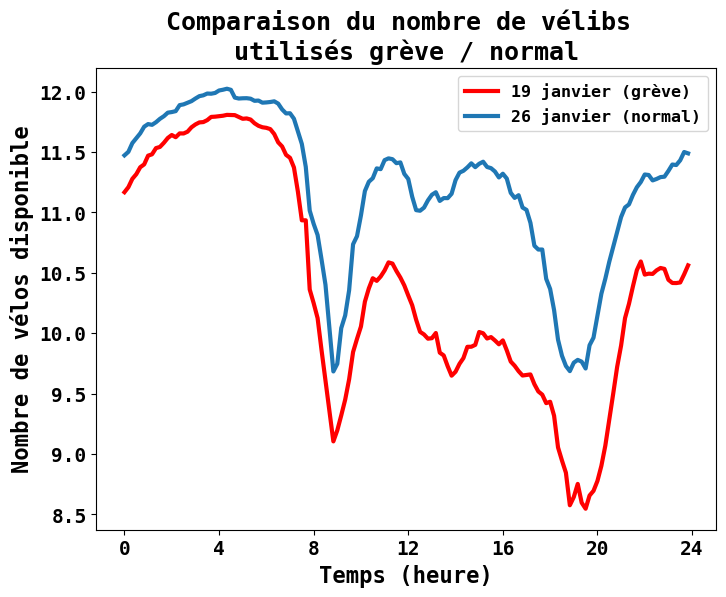

In [161]:
# jour de grève

start_date = dt.datetime(2023, 1, 19) + pd.DateOffset(days=0) 
end_date   = dt.datetime(2023, 1, 19) + pd.DateOffset(days=1)  
mask = (df_time.index>= start_date) & (df_time.index <= end_date)     
Y1 = df_time.loc[mask,'numbikesavailable_mean'].to_numpy()   

# journée standard
start_date = dt.datetime(2023, 1, 26) + pd.DateOffset(days=0)  
end_date   = dt.datetime(2023, 1, 26) + pd.DateOffset(days=1)  
mask = (df_time.index>= start_date) & (df_time.index <= end_date)          
Y2 = df_time.loc[mask,'numbikesavailable_mean'].to_numpy()  


#########
fig, ax = plt.subplots(figsize = (8,6))
    
X = np.arange(0, len(Y1))   
labels = range(0, 80*5, 4)      
plt.xticks(range(0, 2400, 24), labels, **font_ticks) # espacement de 24*10min = 4h
plt.yticks(**font_ticks) 

ax.set_title("Comparaison du nombre de vélibs \nutilisés grève / normal", **font_title)
ax.set_xlabel('Temps (heure)', **font_xy_label)
ax.set_ylabel('Nombre de vélos disponible', **font_xy_label) 

ax.plot(X, Y1, label='19 janvier (grève)', linewidth=3, color='red')   
ax.plot(X, Y2, label='26 janvier (normal)', linewidth=3)   

ax.legend(prop=font_label)




Les deux courbes suivent la même tendance mais on a une utilisation plus importante lors du jour de grève surtout lors de l'après-midi.

# Comparaison journée sans voiture et journée normale

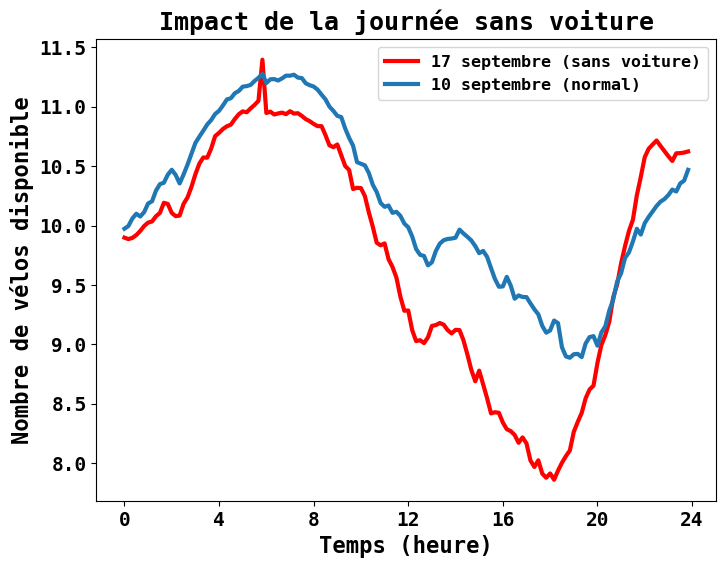

In [162]:
# Journée san svoiture
start_date = dt.datetime(2023, 9, 17) + pd.DateOffset(days=0) 
end_date   = dt.datetime(2023, 9, 17) + pd.DateOffset(days=1) 
mask = (df_time.index>= start_date) & (df_time.index <= end_date)           
Y1 = df_time.loc[mask,'numbikesavailable_mean'].to_numpy()  
                
# Jiurnée standard
start_date = dt.datetime(2023, 9, 10) + pd.DateOffset(days=0)   
end_date   = dt.datetime(2023, 9, 10) + pd.DateOffset(days=1)   
mask = (df_time.index>= start_date) & (df_time.index <= end_date)                 
Y2 = df_time.loc[mask,'numbikesavailable_mean'].to_numpy() 

##########################################
fig, ax = plt.subplots(figsize = (8,6))
    
X = np.arange(0, len(Y1))   
labels = range(0, 80*5, 4)      
plt.xticks(range(0, 2400, 24), labels, **font_ticks) # espacement de 24*10min = 4h
plt.yticks(**font_ticks) 

ax.set_title("Impact de la journée sans voiture", **font_title)
ax.set_xlabel('Temps (heure)', **font_xy_label)
ax.set_ylabel('Nombre de vélos disponible', **font_xy_label) 

ax.plot(X, Y1, label='17 septembre (sans voiture)', linewidth=3, color='red')  
ax.plot(X, Y2, label='10 septembre (normal)', linewidth=3)   

ax.legend(prop=font_label)


